# MT - 1 Explain sigma color and sigma space from the cv2.bilateralFilter()

In OpenCV's cv2.bilateralFilter(), two key parameters control the behavior of the bilateral filter:

1. sigmaColor - Controls how much intensity differences influence filtering.
2. sigmaSpace - Controls how much spatial (distance) differences influence filtering.

cv2.bilateralFilter(src image, d, sigmaColor, sigmaSpace)

**Sigma Color**

1. Defines how much color intensity differences affect filtering.
2. A higher value means even pixels with very different colors will contribute to smoothing.
3. A lower value means only very similar colors will be smoothed.
4. With small sigmaColor, only pixels close in intensity are considered.
5. With large sigmaColor, even different intensity pixels contribute.


**Sigma Space**

1. Defines how much spatial distance influences filtering.
2. A higher value means farther pixels still influence the central pixel.
3. A lower value means only nearby pixels are considered.
4. With small sigmaSpace, only nearby pixels affect filtering.
5. With large sigmaSpace, even far pixels contribute.

| Case                           | `sigmaColor` | `sigmaSpace` | Effect |
|--------------------------------|-------------|-------------|--------|
| **Preserve edges (low smoothing)** | Small       | Small       | Only very similar and close pixels are smoothed. |
| **Smooth noise, keep edges**   | Large       | Small       | Similar pixels contribute even if color is different, but only nearby ones. |
| **Blur entire image**          | Large       | Large       | Even distant and different pixels contribute, leading to heavy blurring. |


#MT - 2 How bilateral filtering calculates the target pixel value

Bilateral filtering computes the new intensity of a target pixel by applying a weighted sum of its neighboring pixels. The weights are determined by two Gaussian functions:

* Spatial Gaussian (f_s) – Gives higher weight to closer pixels.
* Range Gaussian (f_r) – Gives higher weight to pixels with similar intensity.

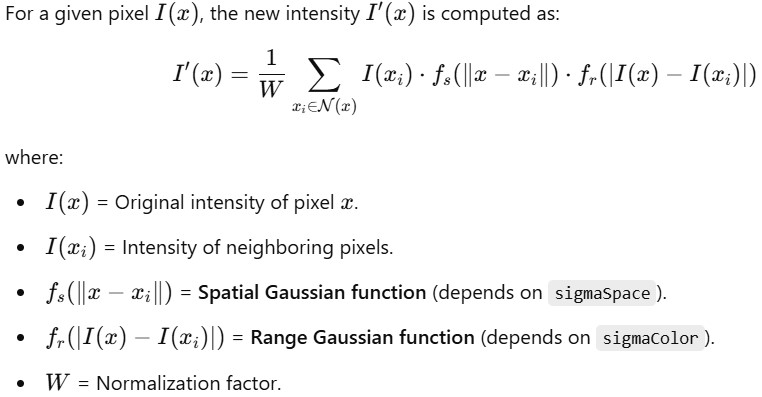

 ## ***Step 1: compute spatial weights fs from all the nearby pixels for target pixel***

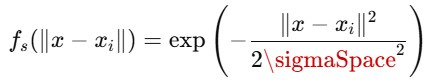

here |X-Xi| is the spatial distance with target pixel

## ***Step 2: compute range weights fr from all the nearby pixels for target pixel***

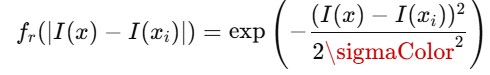

| I(x) - I(xi) | is the intensity difference between nearby pixels and target pixel.

## ***Step 3: compute final weights***

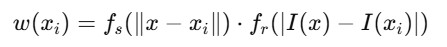

##  ***Step 4: compute the new pixel***

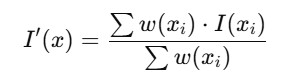

I'(x) is the new pixel value for that target pixel.


# OT - 1: Apply bilateral filter on an image and try to explain the output based on different parameter value combination.

Text(0.5, 1.0, 'small SigmaC, large SigmaS')

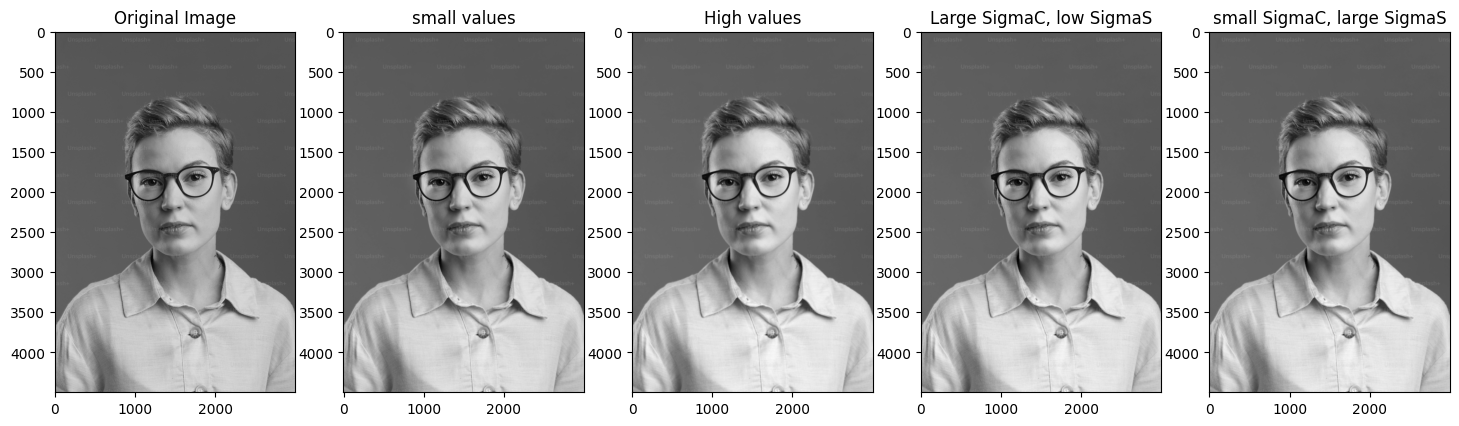

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/premium_photo-1683121771856-3c3964975777.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bilateral_blur1 = cv2.bilateralFilter(image, 10, 50, 50)  # d, sigmaC, Sigma Space
bilateral_blur2 = cv2.bilateralFilter(image, 15, 150, 150)
bilateral_blur3 = cv2.bilateralFilter(image, 10, 150, 50)
bilateral_blur4 = cv2.bilateralFilter(image, 10, 50, 150)

plt.figure(figsize=(18,5))
plt.subplot(1, 5, 1)
plt.imshow(image, 'gray')
plt.title("Original Image")

plt.subplot(1, 5, 2)
plt.imshow(bilateral_blur1, 'gray')
plt.title("small values")

plt.subplot(1, 5, 3)
plt.imshow(bilateral_blur2, 'gray')
plt.title("High values")

plt.subplot(1, 5, 4)
plt.imshow(bilateral_blur3, 'gray')
plt.title("Large SigmaC, low SigmaS")

plt.subplot(1, 5, 5)
plt.imshow(bilateral_blur3, 'gray')
plt.title("small SigmaC, large SigmaS")

## **Explanation**
* In figure 2, d parameter, sigmaC, sigmaS all are small in values so edges will be preserved and very low smoothing will be occured. Edges are well preserved, but moderate noise smoothing occurs. Mild blurring in areas with subtle color differences.
* In figure 3, Much more blurring, including near edges.Some edge preservation, but fine details may be lost. Strong noise reduction, making the image look very soft.
* In figure 4, Blurring in regions with color variation, since sigmaColor is high. Edges are still somewhat preserved due to a limited sigmaSpace. More aggressive noise reduction compared to figure 2.
* In figure 5, Preserves fine details, but smoother textures in large uniform regions. Edges remain very sharp, since sigmaColor is low. More distant pixels affect the filter, leading to an overall soft look.


| Case                          | d  | sigmaColor | sigmaSpace | Effect                                         |
|-------------------------------|----|------------|------------|------------------------------------------------|
| 1️⃣ Small blur, good edges     | 10 | 50         | 50         | Preserves edges, light smoothing.             |
| 2️⃣ Strong blur               | 15 | 150        | 150        | Strong blur, edges slightly blurred.          |
| 3️⃣ Strong color blending      | 10 | 150        | 50         | Blurs color variations, edges remain somewhat preserved. |
| 4️⃣ Large spatial influence    | 10 |  50         | 150        | Distant pixels affect blurring, edges remain sharp. |


# More optional tasks

Text(0.5, 1.0, 'Kernel size 55x55 Median Filter')

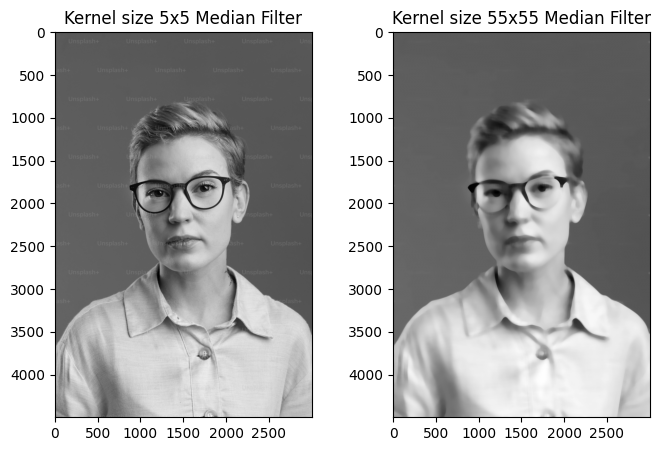

In [ ]:
median_blur1 = cv2.medianBlur(image, 5)
median_blur2 = cv2.medianBlur(image, 55)

plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.imshow(median_blur1, 'gray')
plt.title("Kernel size 5x5 Median Filter")

plt.subplot(1, 2, 2)
plt.imshow(median_blur2, 'gray')
plt.title("Kernel size 55x55 Median Filter")

Text(0.5, 1.0, 'Standard Deviation 10')

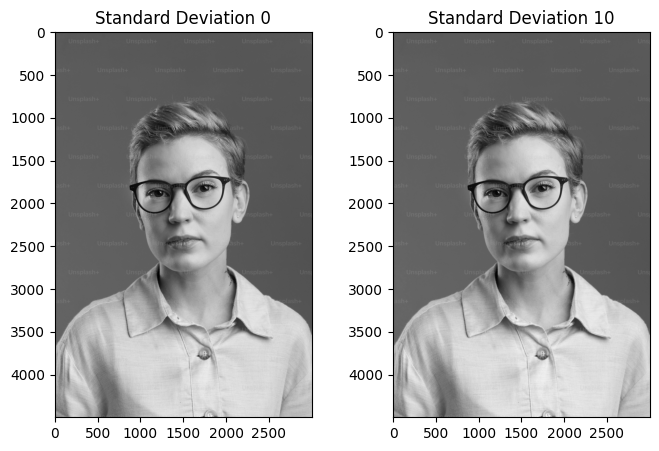

In [ ]:
gaussian_blur1 = cv2.GaussianBlur(image, (5,5), 0)
gaussian_blur2 = cv2.GaussianBlur(image, (5,5), 30)

plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.imshow(gaussian_blur1, 'gray')
plt.title("Standard Deviation 0") # if std is 0 then openCv automatically calculates std based on the kernel size

plt.subplot(1, 2, 2)
plt.imshow(gaussian_blur2, 'gray')
plt.title("Standard Deviation 10") # 0 to 30 gives more blurred image